# **Project Name :- Ride Hailing Data Analysis(EDA)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("Bookings.csv")

# **Problem Statement**
Ride-hailing services produce a large amount of operational data every day. This data includes details about ride bookings, trip completion, cancellations, revenue, customer behavior, and driver performance. The data is collected from different aspects such as time, location, vehicle type, and payment methods. Although this data contains valuable information, it is usually raw and unorganized.
<br><br>
Because the data is not well-structured, it becomes difficult to understand without proper analysis. Important patterns and trends often remain hidden, making it hard for stakeholders to identify problems, inefficiencies, and areas for improvement. Without systematic analysis, understanding ride demand, cancellation reasons, revenue trends, and overall service performance becomes challenging. Therefore, performing proper data analysis is necessary to convert raw ride-hailing data into useful insights that can help improve decision-making and operational efficiency.

## **Objective**
**The objective of this project is to perform Exploratory Data Analysis (EDA) on ride-hailing booking data to extract meaningful insights and understand key patterns influencing service performance.**
### Specifically, this project aims to:
- Analyze overall booking trends, including completed, cancelled, and incomplete rides
- Identify cancellation patterns and assess the impact of customers and drivers on ride outcomes
- Examine relationships between ride distance, fare amount, ratings, and revenue
- Evaluate payment methods and vehicle types to understand revenue distribution
- Detect operational inefficiencies such as high cancellation rates or low completion ratios
- Prepare a clean and analyzed dataset suitable for data visualization and future predictive modeling
<br><br>
Through this analysis, the project seeks to provide actionable insights that can help ride-hailing platforms improve customer satisfaction, optimize operations, and support data-driven decision-making.

# Data Exploration

In [3]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,#NAME?,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,#NAME?,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,#NAME?,NaN
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,#NAME?,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,#NAME?,NaN


In [4]:
df.shape

(103024, 21)

- V_TAT - Vehicle turnaround time (Time vehicle takes to complete one ride and accept another ride.)
- C_TAT - Customer turn around time (Time taken by customer to assign a cab.)


In [5]:
df.describe()

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Unnamed: 20
count,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000,0.0
mean,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313,NaN
std,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957,NaN
min,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000,NaN
25%,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000,NaN
50%,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000,NaN
75%,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000,NaN
max,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000,NaN


- V_TAT = mean = 50%val (distribution is normal)
- C_TAT = mean = 50%val (distribution is normal)
- Booking_value = Has some outliers.
- Ride_distance = Has some outliers.
- Driver_ratings = Almost driver ratings are same.
- Customer_ratings = Almost customer ratings are same. 
#### Numerical colums (Above metioned has almost no effect on bookings.)

In [6]:
# count missing values in each column
df.isnull().sum().reset_index()
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent

Date                            0.000000
Time                            0.000000
Booking_ID                      0.000000
Booking_Status                  0.000000
Customer_ID                     0.000000
Vehicle_Type                    0.000000
Pickup_Location                 0.000000
Drop_Location                   0.000000
V_TAT                          37.910584
C_TAT                          37.910584
Canceled_Rides_by_Customer     89.809171
Canceled_Rides_by_Driver       82.107082
Incomplete_Rides               37.910584
Incomplete_Rides_Reason        96.189237
Booking_Value                   0.000000
Payment_Method                 37.910584
Ride_Distance                   0.000000
Driver_Ratings                 37.910584
Customer_Rating                37.910584
Vehicle Images                  0.000000
Unnamed: 20                   100.000000
dtype: float64

## DATA PREPROCESSING


### Cleaning Opportunities 
1. Filling null values in V_TAT and C_TAT column 
2. Date column contains Date + Time and datatype is object.
3. Null values in driver rating columns.
4. Customer rating column null values. 
5. Vehicle images and Unnamed column is not needed.
6. Time columns values are in object format.


In [7]:
# Removing vehicle images and unnamed column 
df.drop(columns={"Vehicle Images","Unnamed: 20"}, inplace=True)

1. Total 10499 rides were cancelled by customer
2. Total 18434 rides were cancelled by drivers 
3. Total 10124 rides were not executed due to other reasons. 

In [8]:
df['Date'] = df['Date'].str.split(' ').str[0]

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# lets replace booking status column with succes = 1 and cancelled by drivers/riders = 0
df['Booking_Status']=df['Booking_Status'].replace({'Success':1,'Canceled by Driver':0,'Canceled by Customer':0,'Driver Not Found':0})
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\4188070799.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Booking_Status']=df['Booking_Status'].replace({'Success':1,'Canceled by Driver':0,'Canceled by Customer':0,'Driver Not Found':0})


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,14:00:00,CNR7153255142,0,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25,22:20:00,CNR2940424040,1,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,2024-07-30,19:59:00,CNR2982357879,1,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8
3,2024-07-22,03:15:00,CNR2395710036,0,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02,09:02:00,CNR1797421769,1,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31,09:06:00,CNR9488489435,1,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,NaN,NaN,No,NaN,111,Cash,41,3.6,3.8
103020,2024-07-31,15:12:00,CNR3151743100,1,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,NaN,NaN,No,NaN,1097,UPI,17,4.3,3.3
103021,2024-07-31,13:59:00,CNR1286151233,1,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,NaN,NaN,No,NaN,2201,Cash,37,3.6,3.2
103022,2024-07-31,14:56:00,CNR2027162035,1,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,NaN,NaN,No,NaN,267,UPI,47,3.4,3.1


In [11]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')


In [12]:
new_df=df[['Date','Time','Booking_ID','Booking_Status','Customer_ID','Vehicle_Type','Pickup_Location','Drop_Location','V_TAT','C_TAT','Canceled_Rides_by_Customer','Canceled_Rides_by_Driver','Booking_Value','Payment_Method','Ride_Distance','Driver_Ratings','Customer_Rating']]
new_df

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,1900-01-01 14:00:00,CNR7153255142,0,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,444,NaN,0,NaN,NaN
1,2024-07-25,1900-01-01 22:20:00,CNR2940424040,1,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,158,Cash,13,4.1,4.0
2,2024-07-30,1900-01-01 19:59:00,CNR2982357879,1,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,386,UPI,40,4.2,4.8
3,2024-07-22,1900-01-01 03:15:00,CNR2395710036,0,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,384,NaN,0,NaN,NaN
4,2024-07-02,1900-01-01 09:02:00,CNR1797421769,1,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,822,Credit Card,45,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31,1900-01-01 09:06:00,CNR9488489435,1,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,NaN,NaN,111,Cash,41,3.6,3.8
103020,2024-07-31,1900-01-01 15:12:00,CNR3151743100,1,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,NaN,NaN,1097,UPI,17,4.3,3.3
103021,2024-07-31,1900-01-01 13:59:00,CNR1286151233,1,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,NaN,NaN,2201,Cash,37,3.6,3.2
103022,2024-07-31,1900-01-01 14:56:00,CNR2027162035,1,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,NaN,NaN,267,UPI,47,3.4,3.1


- cancelled_rides_by_customers = cancelled = 1 , not_cancelled = 0
- cancelled_rides_by_drivers = cancelled = 1 , not_cancelled = 0
- Payment_method = replace NaN values with 0 i.e. no payment done.
- Driver ratings - replae Nan values with 0. (Data is showing almost normal distribution)
- Customer ratings - replace NaN values with 0. (Data is showing almost normal distribution.)


In [13]:
# Cancelled_rides column replacement
new_df['Canceled_Rides_by_Customer'] = new_df['Canceled_Rides_by_Customer'].notna().astype(int)
new_df['Canceled_Rides_by_Driver'] = new_df['Canceled_Rides_by_Driver'].notna().astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\1540107749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Canceled_Rides_by_Customer'] = new_df['Canceled_Rides_by_Customer'].notna().astype(int)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\1540107749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Canceled_Rides_by_Driver'] = new_df['Canceled_Rides_by_Driver'].notna().astype(int)


In [14]:
new_df

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,1900-01-01 14:00:00,CNR7153255142,0,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,0,1,444,NaN,0,NaN,NaN
1,2024-07-25,1900-01-01 22:20:00,CNR2940424040,1,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,0,0,158,Cash,13,4.1,4.0
2,2024-07-30,1900-01-01 19:59:00,CNR2982357879,1,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,0,0,386,UPI,40,4.2,4.8
3,2024-07-22,1900-01-01 03:15:00,CNR2395710036,0,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,1,0,384,NaN,0,NaN,NaN
4,2024-07-02,1900-01-01 09:02:00,CNR1797421769,1,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,0,0,822,Credit Card,45,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31,1900-01-01 09:06:00,CNR9488489435,1,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,0,0,111,Cash,41,3.6,3.8
103020,2024-07-31,1900-01-01 15:12:00,CNR3151743100,1,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,0,0,1097,UPI,17,4.3,3.3
103021,2024-07-31,1900-01-01 13:59:00,CNR1286151233,1,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,0,0,2201,Cash,37,3.6,3.2
103022,2024-07-31,1900-01-01 14:56:00,CNR2027162035,1,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,0,0,267,UPI,47,3.4,3.1


In [15]:
# Driver and customer ratings column fill with 0 for NaN
new_df['Driver_Ratings'] = new_df['Driver_Ratings'].fillna(0)
new_df['Customer_Rating'] = new_df['Customer_Rating'].fillna(0)
new_df


C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\3106024483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Driver_Ratings'] = new_df['Driver_Ratings'].fillna(0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\3106024483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Customer_Rating'] = new_df['Customer_Rating'].fillna(0)


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26,1900-01-01 14:00:00,CNR7153255142,0,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,0,1,444,NaN,0,0.0,0.0
1,2024-07-25,1900-01-01 22:20:00,CNR2940424040,1,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,0,0,158,Cash,13,4.1,4.0
2,2024-07-30,1900-01-01 19:59:00,CNR2982357879,1,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,0,0,386,UPI,40,4.2,4.8
3,2024-07-22,1900-01-01 03:15:00,CNR2395710036,0,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,1,0,384,NaN,0,0.0,0.0
4,2024-07-02,1900-01-01 09:02:00,CNR1797421769,1,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,0,0,822,Credit Card,45,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31,1900-01-01 09:06:00,CNR9488489435,1,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,0,0,111,Cash,41,3.6,3.8
103020,2024-07-31,1900-01-01 15:12:00,CNR3151743100,1,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,0,0,1097,UPI,17,4.3,3.3
103021,2024-07-31,1900-01-01 13:59:00,CNR1286151233,1,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,0,0,2201,Cash,37,3.6,3.2
103022,2024-07-31,1900-01-01 14:56:00,CNR2027162035,1,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,0,0,267,UPI,47,3.4,3.1


In [16]:
new_df.describe()

,Date,Time,Booking_Status,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,103024,103024.000000,63967.000000,63967.000000,103024.000000,103024.000000,103024.000000,103024.000000,103024.000000,103024.000000
mean,2024-07-15 23:33:01.425687040,1900-01-01 11:58:37.453991424,0.620894,170.876952,84.873372,0.101908,0.178929,548.751883,14.189927,2.481997,2.482529
min,2024-07-01 00:00:00,1900-01-01 00:00:00,0.000000,35.000000,25.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,2024-07-08 00:00:00,1900-01-01 06:01:00,0.000000,98.000000,55.000000,0.000000,0.000000,242.000000,0.000000,0.000000,0.000000
50%,2024-07-16 00:00:00,1900-01-01 11:58:00,1.000000,168.000000,85.000000,0.000000,0.000000,386.000000,8.000000,3.400000,3.400000
75%,2024-07-24 00:00:00,1900-01-01 17:57:00,1.000000,238.000000,115.000000,0.000000,0.000000,621.000000,26.000000,4.200000,4.200000
max,2024-07-31 00:00:00,1900-01-01 23:59:00,1.000000,308.000000,145.000000,1.000000,1.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,NaN,0.485167,80.803640,36.005100,0.302529,0.383295,536.541221,15.776270,1.991983,1.992770


In [17]:
new_df['Time'] = pd.to_datetime(df['Time']).dt.time

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\3237585746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Time'] = pd.to_datetime(df['Time']).dt.time


# Univariate Analysis

In [18]:
new_df.dtypes

Date                          datetime64[ns]
Time                                  object
Booking_ID                            object
Booking_Status                         int64
Customer_ID                           object
Vehicle_Type                          object
Pickup_Location                       object
Drop_Location                         object
V_TAT                                float64
C_TAT                                float64
Canceled_Rides_by_Customer             int64
Canceled_Rides_by_Driver               int64
Booking_Value                          int64
Payment_Method                        object
Ride_Distance                          int64
Driver_Ratings                       float64
Customer_Rating                      float64
dtype: object

In [51]:
# # Seperating numerical and categorical features

categorical_col = new_df.columns.drop(['V_TAT','C_TAT','Canceled_Rides_by_Customer','Canceled_Rides_by_Driver','Booking_Value','Ride_Distance','Driver_Ratings','Customer_Rating'])
numerical_col=new_df.columns.drop(["Time_range",'Hours','Driver_Ratings','Customer_Rating','Vehicle_Type','Pickup_Location','Date','Time', 'Drop_Location','Booking_Status','Payment_Method','Booking_ID','Customer_ID','Canceled_Rides_by_Customer','Canceled_Rides_by_Driver','Ride_Distance'])


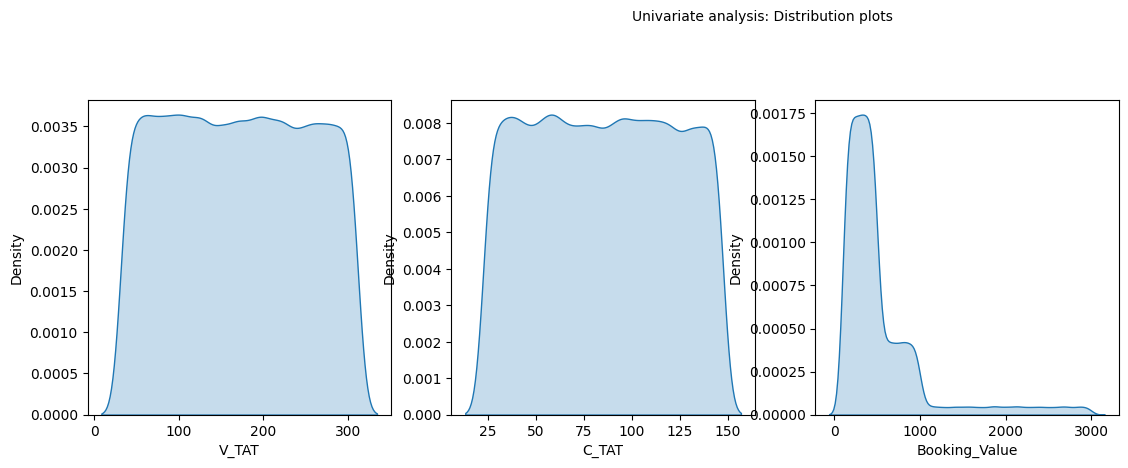

In [52]:
plt.figure(figsize=(18,9))
plt.suptitle('Univariate analysis: Distribution plots', fontsize=10)
for i in range(0, len(numerical_col)):
  plt.subplot(2,4,i+1)
  sns.kdeplot(x=new_df[numerical_col[i]],fill=True)

In [53]:
# Total customers
print("Total customers",new_df['Booking_ID'].nunique())

Total customers 103024


In [54]:
# Total cancelled and sucess rides 
cancelled_rides = new_df['Booking_Status'].value_counts().get(0, 1)
successful_rides = new_df['Booking_Status'].value_counts().get(1, 0)
print("Total rides :-",(successful_rides+cancelled_rides))
print(cancelled_rides)
print(successful_rides)

labels = ['Cancelled Rides', 'Successful Rides']
values = [cancelled_rides, successful_rides]

px.bar(
    x=labels,
    y=values,
    title='Cancelled vs Successful Rides',
    labels={'x': 'Ride Type', 'y': 'Number of Rides'})



Total rides :- 103024
39057
63967


In [23]:
vehicle_bookings = new_df['Vehicle_Type'].value_counts().reset_index()
vehicle_bookings.columns = ['Vehicle_Type', 'total_bookings']

fig = px.bar(
    vehicle_bookings,
    x='Vehicle_Type',
    y='total_bookings',
    title='Total Bookings by Vehicle Type',
    text='total_bookings',
)

fig.update_layout(
    xaxis_title='Vehicle Type',
    yaxis_title='Total Bookings'
)

fig.show()

In [24]:
top_pickup_locations =new_df['Pickup_Location'].value_counts().head(10).reset_index().sort_values('count',ascending=False)
top_pickup_locations
fig=px.line(
    top_pickup_locations,
    x=top_pickup_locations['Pickup_Location'],
    y=top_pickup_locations['count']
)

fig.update_xaxes(tickangle=45)

In [25]:
# total cancelled rides by customer and driver
cancel_driver = new_df['Canceled_Rides_by_Driver'].value_counts().get(1,0)
cancel_customer = new_df['Canceled_Rides_by_Customer'].value_counts().get(1,0)


cancel_df = pd.DataFrame({
    'Category': ['Total Cancelled Rides', 'Total Cancelled Rides'],
    'Cancelled_By': ['Driver', 'Customer'],
    'Cancelled_Count': [cancel_driver, cancel_customer]
})

fig = px.bar(
    cancel_df,
    x='Category',
    y='Cancelled_Count',
    color='Cancelled_By',
    barmode='group',
    text='Cancelled_Count',
    title='Total Cancelled Rides : Driver vs Customer'
)

fig.show()



In [26]:
# Payment method wise analysis
payment_method = new_df['Payment_Method'].value_counts().reset_index().sort_values('count',ascending=False)
px.bar(
    payment_method,
    x=payment_method['Payment_Method'],
    y=payment_method['count'],
)

In [27]:
# Average ride distance,customer and driver ratings
new_df[['Ride_Distance','Driver_Ratings','Customer_Rating']].describe()

,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024.000000,103024.000000,103024.000000
mean,14.189927,2.481997,2.482529
std,15.776270,1.991983,1.992770
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,8.000000,3.400000,3.400000
75%,26.000000,4.200000,4.200000
max,49.000000,5.000000,5.000000


## Bivariate Analysis

In [28]:
new_df['Time']= pd.to_datetime(new_df['Time'],format='%H:%M:%S')
new_df['Hours']=new_df['Time'].dt.hour

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\3378029832.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\3378029832.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
bins = [0, 5, 11, 17, 21, 24]
labels = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
new_df['Time_range']=pd.cut(new_df['Hours'],bins=bins,labels=labels,right=False)

In [30]:
booking_counts = new_df.groupby('Time_range')['Booking_ID'].count().reset_index()
booking_counts.columns = ['Time_range', 'Booking_count']

fig = px.scatter(
    booking_counts,
    x='Time_range',
    y='Booking_count',
    size='Booking_count',  
    title='Bookings Across Time Ranges',
    labels={
        'time_range': 'Time Range',
        'booking_count': 'Number of Bookings'
    },
    color='Booking_count'
)

fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\382579388.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [31]:
#maximum V_TAT and C_TAT according to time ranges 

tat_summary = (
    new_df.groupby('Time_range')[['V_TAT', 'C_TAT']]
      .median()
      .reset_index()
)
max_vtat = tat_summary.loc[tat_summary['V_TAT'].idxmax()]
max_ctat = tat_summary.loc[tat_summary['C_TAT'].idxmax()]

print("Max V-TAT time range:", max_vtat['Time_range'])
print("Max C-TAT time range:", max_ctat['Time_range'])


Max V-TAT time range: Night
Max C-TAT time range: Late Night


C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\4094865264.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Max V-TAT time range: Night
- Max C-TAT time range: Late Night

In [32]:
summary = (
    new_df.groupby('Time_range')['Booking_Status']
    .agg(
        total_bookings='count',
        cancellations=lambda x: (x == 0).sum()
    )
    .reset_index()
)

summary['cancellation_rate'] = round((
    summary['cancellations'] / summary['total_bookings'] * 100),2)

px.bar(
    summary,
    x=summary['Time_range'],
    y=['total_bookings','cancellations'],
    barmode='group',
    title='Total Bookings vs Cancellations by Time Range',
    labels={
        'value': 'Number of Bookings',
        'Time_range': 'Time Range',
        'variable': 'Metric'
    }
)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15704\875868026.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [33]:
new_df

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Hours,Time_range
0,2024-07-26,1900-01-01 14:00:00,CNR7153255142,0,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,0,1,444,NaN,0,0.0,0.0,14,Afternoon
1,2024-07-25,1900-01-01 22:20:00,CNR2940424040,1,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,0,0,158,Cash,13,4.1,4.0,22,Night
2,2024-07-30,1900-01-01 19:59:00,CNR2982357879,1,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,0,0,386,UPI,40,4.2,4.8,19,Evening
3,2024-07-22,1900-01-01 03:15:00,CNR2395710036,0,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,1,0,384,NaN,0,0.0,0.0,3,Late Night
4,2024-07-02,1900-01-01 09:02:00,CNR1797421769,1,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,0,0,822,Credit Card,45,4.0,3.0,9,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31,1900-01-01 09:06:00,CNR9488489435,1,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,0,0,111,Cash,41,3.6,3.8,9,Morning
103020,2024-07-31,1900-01-01 15:12:00,CNR3151743100,1,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,0,0,1097,UPI,17,4.3,3.3,15,Afternoon
103021,2024-07-31,1900-01-01 13:59:00,CNR1286151233,1,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,0,0,2201,Cash,37,3.6,3.2,13,Afternoon
103022,2024-07-31,1900-01-01 14:56:00,CNR2027162035,1,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,0,0,267,UPI,47,3.4,3.1,14,Afternoon


# Insights
- The cancellation rate is high, possibly due to increased V_TAT and C_TAT.
- **Banashankari** is the leading pickup location, indicating high demand.
- Driver cancellations exceed customer cancellations, pointing to operational issues.
- Vehicle type has minimal impact on booking volume.
- Cash is the dominant payment method, which may raise trust and transparency concerns.
- Bookings peak during morning hours (5 AM–10 AM).
- V_TAT is higher at night, likely due to limited driver availability.
- C_TAT increases during late-night hours, affecting customer experience.